In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt





Data collection

In [3]:
parkinsons_data=pd.read_csv("/content/parkinsons.csv")

In [4]:
parkinsons_data.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
#number of rows and column
parkinsons_data.shape

(195, 24)

In [6]:
parkinsons_data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [7]:
# getting more info
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
#checking for missing value in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

Finding null values with Heatmap

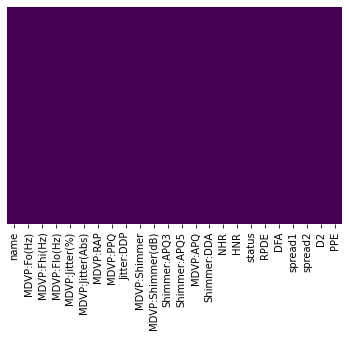

In [9]:
sns.heatmap(parkinsons_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

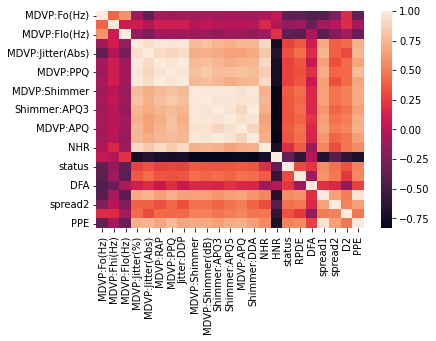

In [10]:
#Checking corelation with each variable by heatmap
sns.heatmap(parkinsons_data.corr())

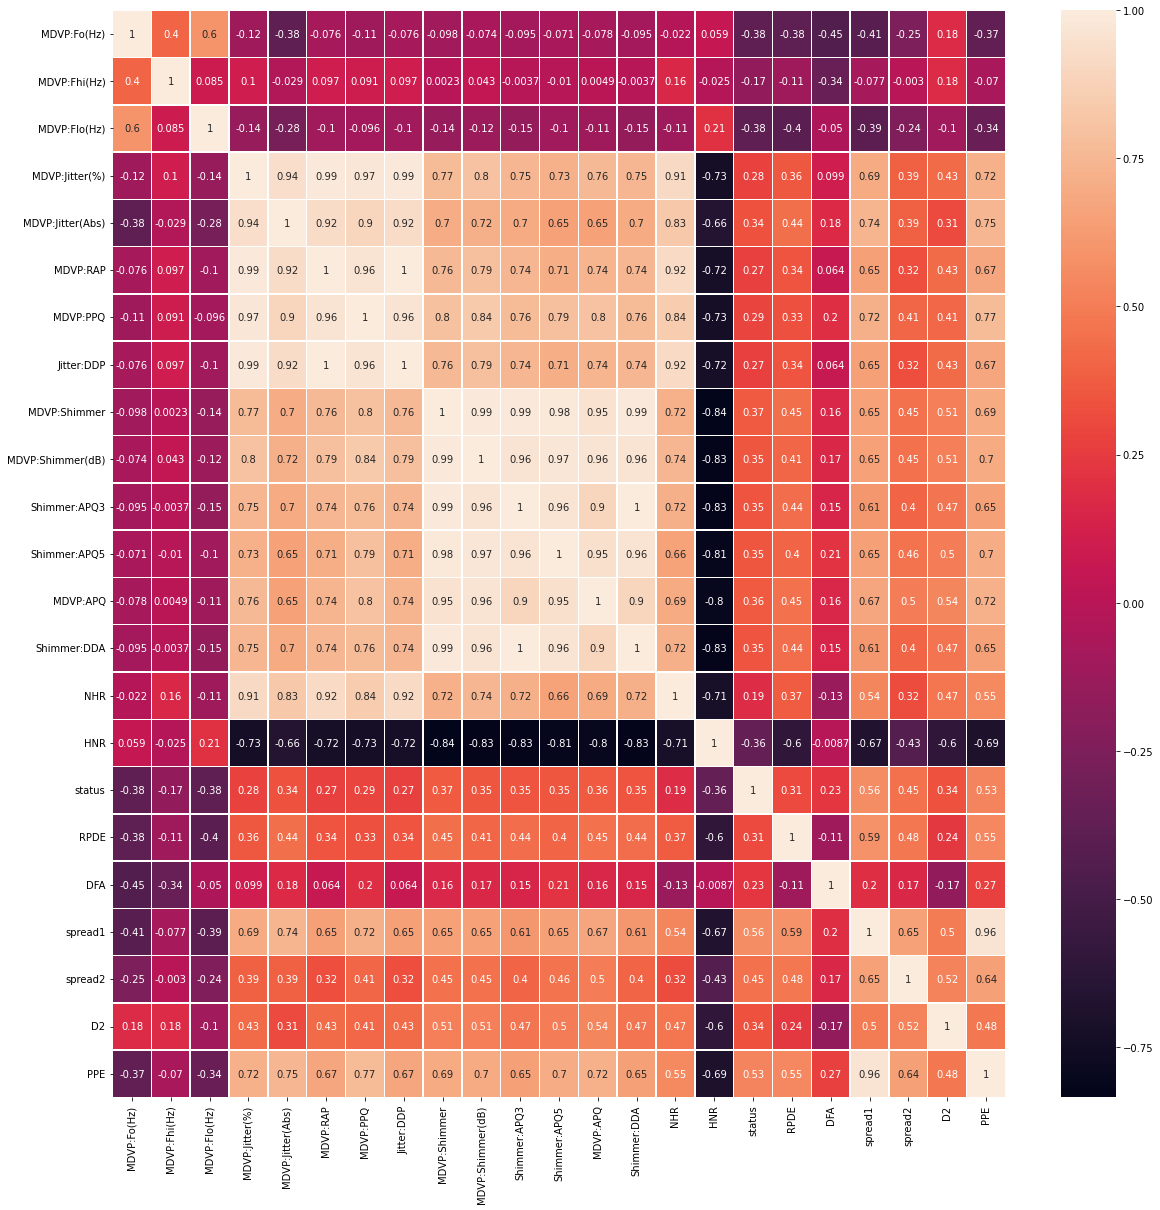

In [11]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(parkinsons_data.corr(),annot=True,linewidths=.5,ax=ax)

In [12]:
# getting some statiscal measure about data
parkinsons_data.describe()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [13]:
#distribution of target variable about data
parkinsons_data['status'].value_counts()


1    147
0     48
Name: status, dtype: int64

1--->parkinsons positive
0---> healty


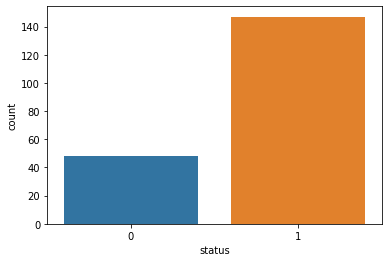

In [14]:
sns.countplot(x='status',data=parkinsons_data)

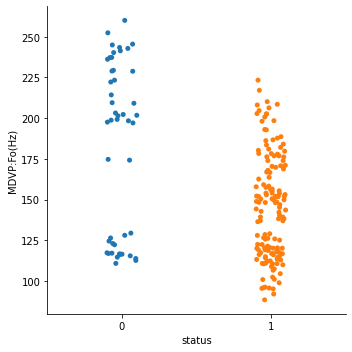

In [15]:
sns.catplot(x = 'status',y = 'MDVP:Fo(Hz)',data=parkinsons_data)

In [16]:
#grouping the data based on the target variable 
parkinsons_data.groupby('status').mean()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


Data Pre-procesing

Separating the features & target

In [17]:
X=parkinsons_data.drop(columns=['name','status'],axis=1 )
Y=parkinsons_data['status']

In [18]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [19]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Spliting the data to traning data &test data 

In [42]:
X_train, X_test ,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

print(X.shape,X_train.shape,X_test.shape )


(195, 22) (156, 22) (39, 22)


Data standardization

In [21]:
scaler=StandardScaler()

In [36]:
scaler.fit(X_train)


StandardScaler()

In [38]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [24]:
print(X_train)


[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


#Model Evaluation

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix


Support Vector Machine

Confusion matrix: 

[[ 4  4]
 [ 1 30]]

Classification report: 

              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.88      0.97      0.92        31

    accuracy                           0.87        39
   macro avg       0.84      0.73      0.77        39
weighted avg       0.87      0.87      0.86        39

model accuracy is : 87.0 %

 confusion Matrix for Train data
 confusion Matrix for Test data


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


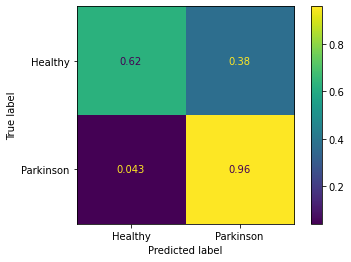

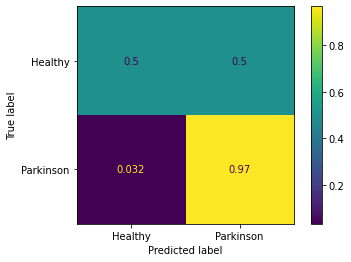

In [43]:
from sklearn import svm

model1=svm.SVC(kernel='linear',probability=True,random_state = 0)
model1.fit(X_train,Y_train)

Y_prediction1 = model1.predict(X_test)


print("Confusion matrix: \n")
print(confusion_matrix(Y_test,Y_prediction1))
print("\nClassification report: \n")
print(classification_report(Y_test,Y_prediction1))
accuracy = accuracy_score(Y_test,Y_prediction1)*100
print(f'model accuracy is : {accuracy.round()} %')

print("\n confusion Matrix for Train data")
plot_confusion_matrix(model1, X_train, Y_train, normalize='true',display_labels=["Healthy","Parkinson"]);
print(" confusion Matrix for Test data")
plot_confusion_matrix(model1, X_test, Y_test, normalize='true',display_labels=["Healthy","Parkinson"]);


Random Forest Classifier:

Confusion matrix: 

[[ 5  3]
 [ 5 26]]

Classification report: 

              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.90      0.84      0.87        31

    accuracy                           0.79        39
   macro avg       0.70      0.73      0.71        39
weighted avg       0.82      0.79      0.80        39

model accuracy is : 79.0 %

 confusion Matrix for Train data
 confusion Matrix for Test data


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


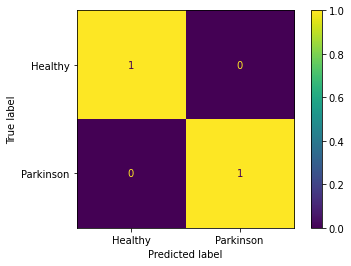

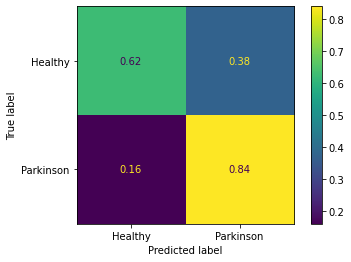

In [44]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(X_train,Y_train)

Y_prediction2 = model2.predict(X_test)


print("Confusion matrix: \n")
print(confusion_matrix(Y_test,Y_prediction2))
print("\nClassification report: \n")
print(classification_report(Y_test,Y_prediction2))
accuracy = accuracy_score(Y_test,Y_prediction2)*100
print(f'model accuracy is : {accuracy.round()} %')

print("\n confusion Matrix for Train data")
plot_confusion_matrix(model2, X_train, Y_train, normalize='true',display_labels=["Healthy","Parkinson"]);
print(" confusion Matrix for Test data")
plot_confusion_matrix(model2, X_test, Y_test, normalize='true',display_labels=["Healthy","Parkinson"]);



Decision Tree Classifier:

Confusion matrix: 

[[ 7  1]
 [ 8 23]]

Classification report: 

              precision    recall  f1-score   support

           0       0.47      0.88      0.61         8
           1       0.96      0.74      0.84        31

    accuracy                           0.77        39
   macro avg       0.71      0.81      0.72        39
weighted avg       0.86      0.77      0.79        39

model accuracy is : 77.0 %

 confusion Matrix for Train data
 confusion Matrix for Test data


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


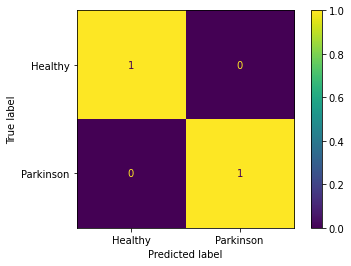

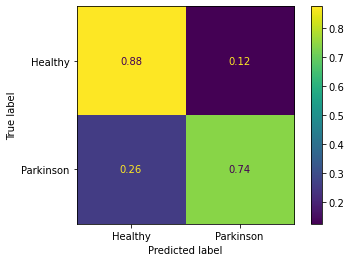

In [45]:
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier()
model3.fit(X_train,Y_train)

Y_prediction3 = model3.predict(X_test)


print("Confusion matrix: \n")
print(confusion_matrix(Y_test,Y_prediction3))
print("\nClassification report: \n")
print(classification_report(Y_test,Y_prediction3))
accuracy = accuracy_score(Y_test,Y_prediction3)*100
print(f'model accuracy is : {accuracy.round()} %')

print("\n confusion Matrix for Train data")
plot_confusion_matrix(model3, X_train, Y_train, normalize='true',display_labels=["Healthy","Parkinson"]);
print(" confusion Matrix for Test data")
plot_confusion_matrix(model3, X_test, Y_test, normalize='true',display_labels=["Healthy","Parkinson"]);


Naive Bayes

Confusion matrix: 

[[ 8  0]
 [16 15]]

Classification report: 

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         8
           1       1.00      0.48      0.65        31

    accuracy                           0.59        39
   macro avg       0.67      0.74      0.58        39
weighted avg       0.86      0.59      0.62        39

model accuracy is : 59.0 %

 confusion Matrix for Train data
 confusion Matrix for Test data


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


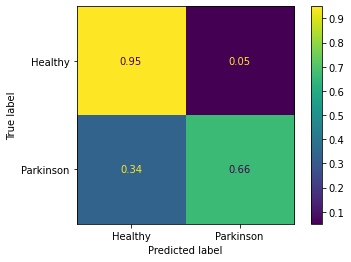

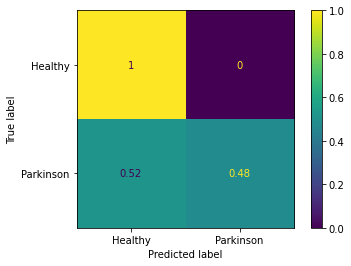

In [46]:
from sklearn.naive_bayes import GaussianNB

model4=GaussianNB()
model4.fit(X_train,Y_train)

Y_prediction4 = model4.predict(X_test)


print("Confusion matrix: \n")
print(confusion_matrix(Y_test,Y_prediction4))
print("\nClassification report: \n")
print(classification_report(Y_test,Y_prediction4))
accuracy = accuracy_score(Y_test,Y_prediction4)*100
print(f'model accuracy is : {accuracy.round()} %')

print("\n confusion Matrix for Train data")
plot_confusion_matrix(model4, X_train, Y_train, normalize='true',display_labels=["Healthy","Parkinson"]);
print(" confusion Matrix for Test data")
plot_confusion_matrix(model4, X_test, Y_test, normalize='true',display_labels=["Healthy","Parkinson"]);


Prediction probabilities 

In [30]:
r_probs = [0 for _ in range(len(Y_test))]
svm_probs = model1.predict_proba(X_test)
rf_probs = model2.predict_proba(X_test)
dt_probs = model3.predict_proba(X_test)
nb_probs = model4.predict_proba(X_test)

Probabilities for the positive outcome is kept.

In [31]:
svm_probs = svm_probs[:, 1]
rf_probs = rf_probs[:, 1]
dt_probs = dt_probs[:, 1]
nb_probs = nb_probs[:, 1]

Computing AUROC and ROC curve values

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
#Calculate AUROC
#ROC is the receiver operating characteristic AUROC is the area under the ROC curve

r_auc = roc_auc_score(Y_test, r_probs)
svm_auc = roc_auc_score(Y_test, svm_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
dt_auc = roc_auc_score(Y_test, dt_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)


print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('SVM: AUROC = %.3f' % (svm_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Decission Tree: AUROC = %.3f' % (dt_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
SVM: AUROC = 0.819
Random Forest: AUROC = 0.887
Decission Tree: AUROC = 0.792
Naive Bayes: AUROC = 0.879


Calculate ROC curve

In [33]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
svm_fpr, svm_tpr, _ = roc_curve(Y_test, svm_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
dt_fpr, dt_tpr, _ = roc_curve(Y_test, dt_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)

Plot the ROC curve

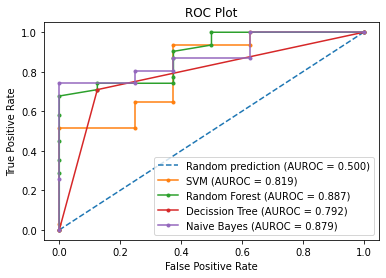

In [34]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decission Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() 
# Show plot
plt.show()

In [47]:
#129.336,139.867,118.604,0.0049,0.00004,0.00165,0.00183,0.00495,0.02498,0.228,0.01396,0.01219,0.01947,0.04188,0.00484,25.429,0,0.420383,0.785714,-6.836811,0.269866,2.223719,0.147491

input_data = (129.336,139.867,118.604,0.0049,0.00004,0.00165,0.00183,0.00495,0.02498,0.228,0.01396,0.01219,0.01947,0.04188,0.00484,25.429,0.420383,0.785714,-6.836811,0.269866,2.223719,0.147491)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction1 = model1.predict(std_data)
print('SVM_Prediction: ',prediction1)
if (prediction1[0] == 0):
  print(" SVM:The Person does not have Parkinsons Disease\n")

else:
  print(" SVM:The Person has Parkinsons\n")


prediction2 = model2.predict(std_data)
print('RandomForest: ',prediction2)



if (prediction2[0] == 0):
  print(" RandomForest:The Person does not have Parkinsons Disease\n")

else:
  print(" Random: The Person has Parkinsons\n")


prediction3 = model3.predict(std_data)
print('Decission_Tree_Prediction: ',prediction3)
if (prediction3[0] == 0):
  print(" Decission Tree:The Person does not have Parkinsons Disease\n")

else:
  print("Decission Tree:The Person has Parkinsons\n")


prediction4 = model4.predict(std_data)
print('Naive_Bayes_Prediction: ',prediction4)
if (prediction4[0] == 0):
  print(" Naive_Bayes:The Person does not have Parkinsons Disease\n")

else:
  print("Naive_Bayes:The Person has Parkinsons\n")




SVM_Prediction:  [1]
 SVM:The Person has Parkinsons

RandomForest:  [0]
 RandomForest:The Person does not have Parkinsons Disease

Decission_Tree_Prediction:  [0]
 Decission Tree:The Person does not have Parkinsons Disease

Naive_Bayes_Prediction:  [0]
 Naive_Bayes:The Person does not have Parkinsons Disease



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
